In [1]:
from keras.datasets import fashion_mnist
((x_train, y_train), (x_test, y_test)) = fashion_mnist.load_data()

Using TensorFlow backend.
E:\PyETL\venv\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
E:\PyETL\venv\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
E:\PyETL\venv\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
E:\PyETL\venv\lib\site-packages\tensorflow\python\framework\dtypes.py:519: FutureWarning: Passing (type, 1) or '1

In [2]:
print(x_train.shape)
print(x_test.shape)

(60000, 28, 28)
(10000, 28, 28)


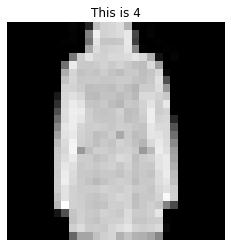

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline
import random
c = random.randint(0, 59999)
plt.title("This is " + str(y_train[c]))
plt.axis("off")
plt.imshow(x_train[c], cmap="gray")

In [4]:
import pandas as pd
pd.DataFrame(x_train[c])

,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,27
0,0,0,0,0,0,0,0,0,5,0,...,2,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,3,0,...,4,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,2,3,0,...,0,2,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,1,0,0,0,...,0,0,2,1,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,119,204,...,176,18,0,5,0,0,0,0,0,0
5,0,0,0,0,0,0,0,114,235,201,...,218,161,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,173,213,194,...,197,215,9,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,195,214,200,...,200,225,81,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,212,212,203,...,204,221,151,0,0,0,0,0,0,0
9,0,0,0,0,0,0,25,215,224,215,...,217,210,200,0,0,0,0,0,0,0


In [5]:
from keras.models import Sequential
from keras.layers import Dense
mlp = Sequential()
# 784 * 256 + 256(bias)
mlp.add(Dense(256, activation="relu", input_dim=784))
# 256 * 10 + 10(bias)
mlp.add(Dense(10, activation="softmax"))
mlp.summary()




Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 256)               200960    
_________________________________________________________________
dense_2 (Dense)              (None, 10)                2570      
Total params: 203,530
Trainable params: 203,530
Non-trainable params: 0
_________________________________________________________________


In [6]:
mlp.compile(loss="categorical_crossentropy", 
           optimizer="adam", 
           metrics=["accuracy"])

In [7]:
# 對圖片處裡: 攤開(1D) -> 0~1 (一開始隨機的 WEIGHT才能配合上)
x_train_norm = x_train.reshape(60000, 784) / 255
x_test_norm = x_test.reshape(10000, 784) / 255
x_train_norm[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [8]:
# 對答案處理: One-Hot Encoding > 10個機率
from keras.utils.np_utils import to_categorical
y_train_cat = to_categorical(y_train)
y_test_cat = to_categorical(y_test)
# DEMO
print("Before: ", y_train[0])
print("After: ", y_train_cat[0])

Before:  9
After:  [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


In [9]:
# batch_size: 看多少筆資料調整(梯度下降)一次
# 看資料決定: 資料小(100~200) 資料大(10~20)
# epochs: 整份資料(60000)看幾次[模型何時該停止訓練]
# val_loss: 平滑時就該停下來了
# validation_split: 用沒看過得資料 來驗證模型好壞
# verbose: log多寡(1: 最詳細, 2: 必要的, 0: 不印)
# 調整次數: 60000 * 0.9 * 10(epochs)
mlp.fit(x=x_train_norm, y=y_train_cat, 
        batch_size=20, 
        epochs=16, 
        validation_split=0.1,
        verbose=2)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where

Train on 54000 samples, validate on 6000 samples
Epoch 1/16
 - 6s - loss: 0.4853 - acc: 0.8278 - val_loss: 0.4057 - val_acc: 0.8510
Epoch 2/16
 - 6s - loss: 0.3659 - acc: 0.8656 - val_loss: 0.3770 - val_acc: 0.8612
Epoch 3/16
 - 6s - loss: 0.3294 - acc: 0.8799 - val_loss: 0.3450 - val_acc: 0.8762
Epoch 4/16
 - 6s - loss: 0.3036 - acc: 0.8877 - val_loss: 0.3626 - val_acc: 0.8707
Epoch 5/16
 - 5s - loss: 0.2886 - acc: 0.8937 - val_loss: 0.3418 - val_acc: 0.8742
Epoch 6/16
 - 5s - loss: 0.2697 - acc: 0.9002 - val_loss: 0.3246 - val_acc: 0.8873
Epoch 7/16
 - 5s - loss: 0.2605 - acc: 0.9034 - val_loss: 0.3400 - val_acc: 0.8818
Epoch 8/16
 - 6s - loss: 0.2498 - acc: 0.9069 - val_loss: 0.3252 - val_acc: 0.8830
Epoch 9/16
 - 5s - loss: 0.2386 - acc: 0.9100 - val_loss: 0.3231 - val_acc: 0.8897
Epoch 10/16
 - 5s - loss: 0.2304 - acc: 0.9142 - val_loss: 0.3309 - val_acc: 0.8858
Epoch 11/16
 - 5s - loss:

In [10]:
mlp.evaluate(x_test_norm, y_test_cat)

10000/10000 [==============================] - 0s 14us/step


[0.3637726740628481, 0.8897]

In [25]:
from sklearn.metrics import confusion_matrix
base = list(range(10))
i = [str(b) + "(原本)" for b in base]
c = [str(b) + "(預測)" for b in base]

pre = mlp.predict_classes(x_test_norm)
# confusion_matrix(y_test, pre)

pd.DataFrame(confusion_matrix(y_test, pre),
            columns=c,
            index=i)

,0(預測),1(預測),2(預測),3(預測),4(預測),5(預測),6(預測),7(預測),8(預測),9(預測)
0(原本),876,1,16,20,3,2,79,0,3,0
1(原本),3,968,0,21,2,0,6,0,0,0
2(原本),16,0,837,10,71,0,63,0,3,0
3(原本),25,6,15,912,20,0,19,0,3,0
4(原本),0,0,102,42,780,0,71,0,5,0
5(原本),0,0,0,0,0,975,0,18,1,6
6(原本),146,0,88,30,43,0,681,0,12,0
7(原本),0,0,0,0,0,15,0,953,0,32
8(原本),7,0,5,3,3,8,11,12,951,0
9(原本),1,0,0,0,0,11,1,23,0,964


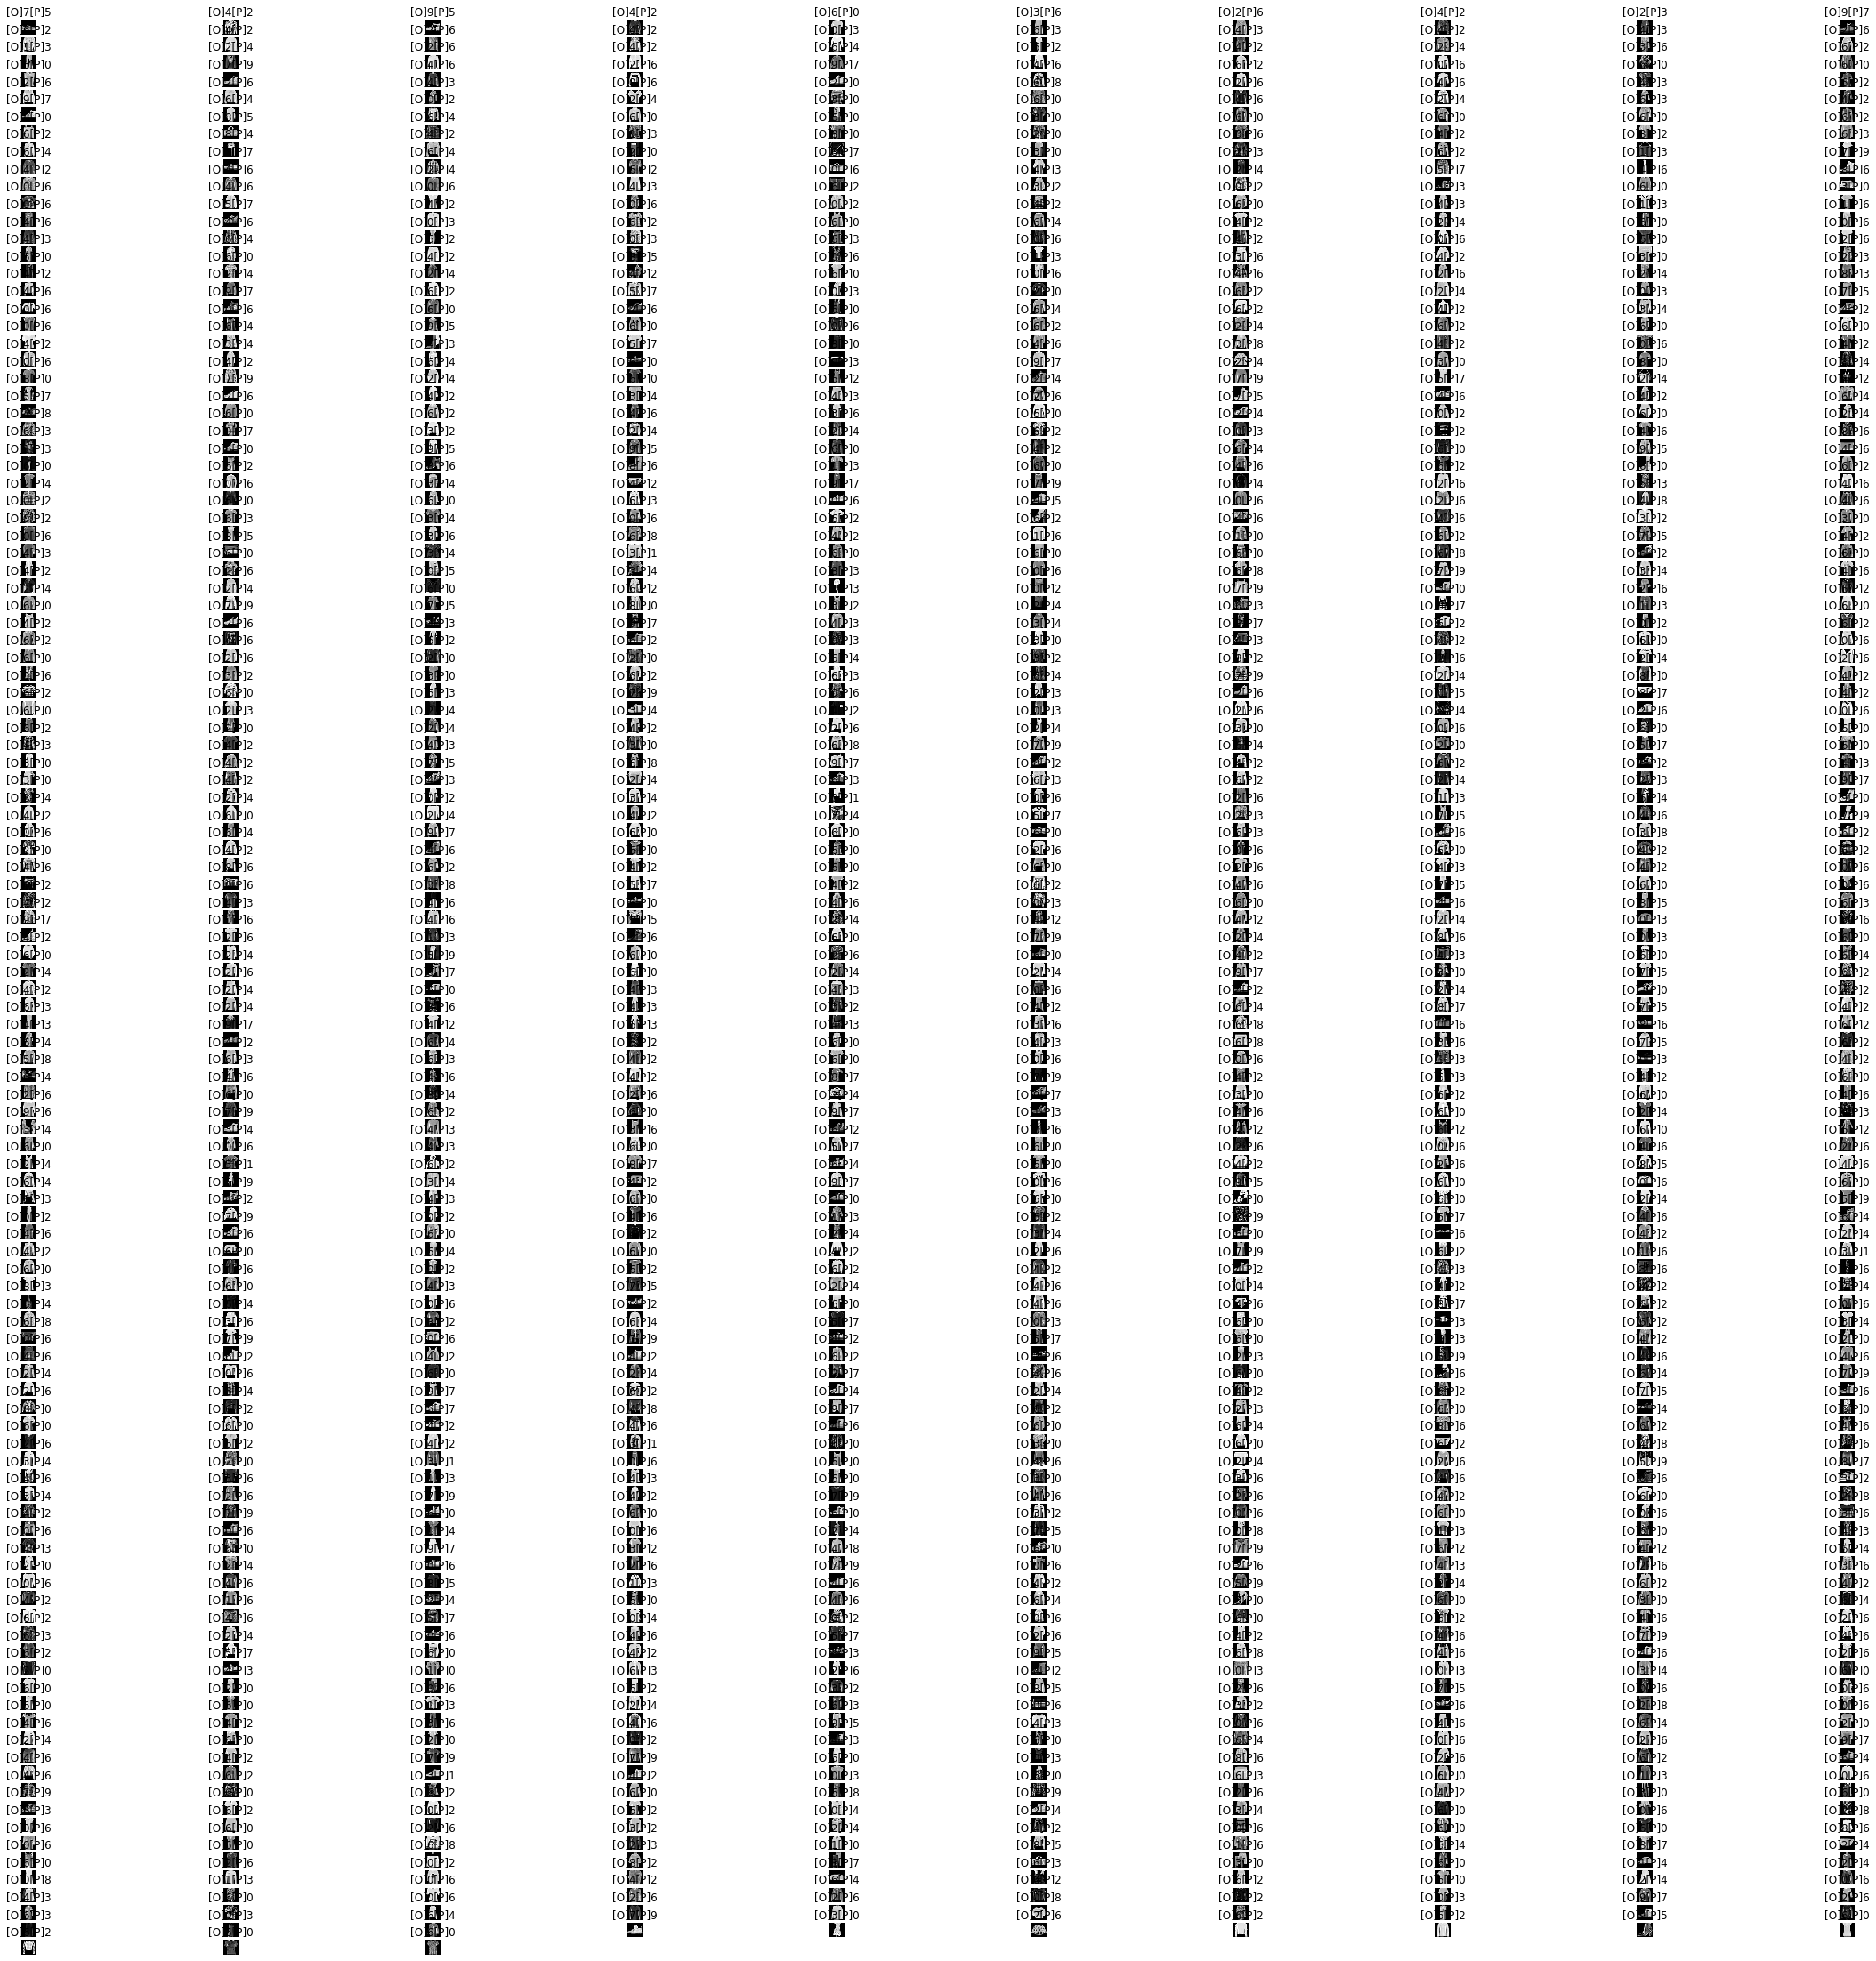

In [27]:
import numpy as np
idx = np.nonzero(pre != y_test)[0]
# 預測錯誤的圖片
false_img = x_test[idx]
# 預測錯誤圖片的正確答案
false_answer = y_test[idx]
# 預測錯誤圖片的預測標籤
false_pre = pre[idx]

width = 10
height = len(false_img) // width + 1
plt.figure(figsize=(14, 40))
for i, img in enumerate(false_img):
    plt.subplot(height, width, i+1)
    t = "[O]" + str(false_answer[i]) + "[P]" + str(false_pre[i])
    plt.title(t)
    plt.axis("off")
    plt.imshow(img, cmap="gray")

In [36]:
from keras.preprocessing.image import load_img
fp = input("你的測試圖片")
img = load_img(fp, target_size=(28, 28))
# np.array(img)
grayimg = np.array(img.convert("L"))
grayimg = grayimg.reshape(784) / (255)
grayimgnp = np.array([grayimg])

pre = mlp.predict_classes(grayimgnp)
print("我覺得是", pre)
img

你的測試圖片adidas_originals_adilette_slides-linen_green1.jpg
我覺得是 [8]
